# Hypothesis Testing

In [1]:
!pip install scipy

In [133]:
# !pip install researchpy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [2]:
bike_sharing_data = pd.read_csv('datasets/day.csv')

bike_sharing_data.shape

(731, 16)

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [5]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [6]:
bike_sharing_data['above_average_temp'] = bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [7]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,above_average_temp
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [8]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
bike_sharing_data['workingday'].unique()

array([0, 1], dtype=int64)

In [10]:
bike_sharing_data['holiday'].unique()

array([0, 1], dtype=int64)

In [11]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [12]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [13]:
bike_sharing_data['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [14]:
bike_sharing_data.shape

(731, 8)

In [15]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


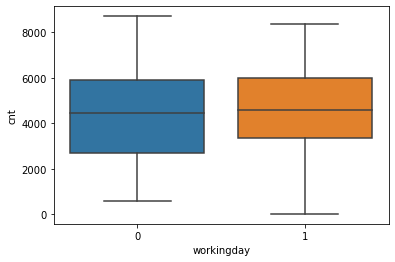

In [16]:
sns.boxplot(x='workingday', y='cnt', data=bike_sharing_data)

In [34]:
sample_01 = bike_sharing_data.query('workingday == 1').reset_index(drop=True)

sample_02 = bike_sharing_data.query('workingday == 0').reset_index(drop=True)

In [35]:
sample_01.shape, sample_02.shape

((500, 8), (231, 8))

In [36]:
# take a sample of the size of the smallest to compare.

sample_01 = sample_01.sample(231).reset_index(drop=True)
sample_01.shape, sample_02.shape

((231, 8), (231, 8))

## The hypothesis being tested

<b>Null hypothesis (H0):</b> u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`

<b>Alternative hypothesis (H1):</b> u1 != u2, which translates to the means of `sample01` is not equal to `sample 02`

## Performing the independent t-test

In [20]:
from scipy import stats

In [21]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=0.7052077526513694, pvalue=0.481037886489036)

Como pvalue > 0.05, eu não posso rejeitar a hipótese de que as médias de `sample_01` e `sample_02` sejam iguais (hipótese nula) com uma confiança maior que 0.95 (95%).

# Another example

In [22]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,above_average_temp
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [23]:
bike_sharing_data.groupby('above_average_temp')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
above_average_temp,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


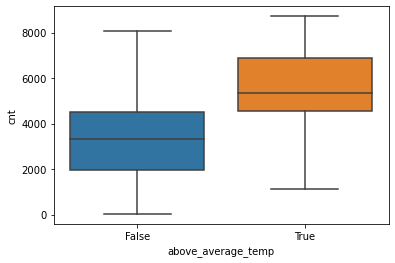

In [24]:
sns.boxplot(x='above_average_temp', y='cnt', data=bike_sharing_data)

In [30]:
sample_01 = bike_sharing_data.query('above_average_temp == 1').reset_index(drop=True)

sample_02 = bike_sharing_data.query('above_average_temp == 0').reset_index(drop=True)

In [31]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [32]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.949601069584226, pvalue=2.042677983353176e-65)

## Some theory

### Homogeneity of variance (Homoscedasticity)

- T-tests and ANOVA (analysis of variances) <u>assumes</u> that the samples to be compared <b>have same variance</b> (i.e, they have homogeneity of variance). In reality, t and F statistics (the statistics used by these tests) are actually robust to violations in this assumption if the samples have <b>roughly the same size</b>.


- The most common assessment for homogeneity of variance is <u>Levene's test</u>. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. This means: if we perform Levene's test and obtain a p value less than .05, it indicates that we can <u> reject the hypothesis that variance is equal across groups </u>, hence a violation of the homscedasticity assumption.


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [37]:
# we want to check whether the variable `cnt` in our dataframe have same variance across samples:


# hipotese nula do teste de levene é 
# H0: as variâncias entre as amostras são iguais
# H1: as variâncias entre as amostras são diferentes

stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=1.879739166326043, pvalue=0.17103230743555853)

Como pvalue > 0.05, novamente, não posso rejeitar a hipótese de que as variâncias são iguais.

### Normal distribution  of residuals

Another important assumption of these tests we are performing is: the residuals between the groups needs to be normally distributed - that is, if we subtract the sample values, we need to obtain a gaussian distribution.

#### Checking difference between two pair points

https://pythonfordatascience.org/independent-t-test-python/

In [38]:
from sklearn.preprocessing import scale

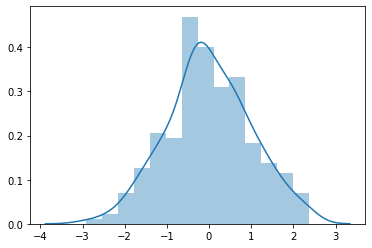

In [39]:
diff = scale(sample_01['cnt'] - sample_02['cnt'])

sns.distplot(diff);

#### Checking for normality by Q-Q plot graph

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

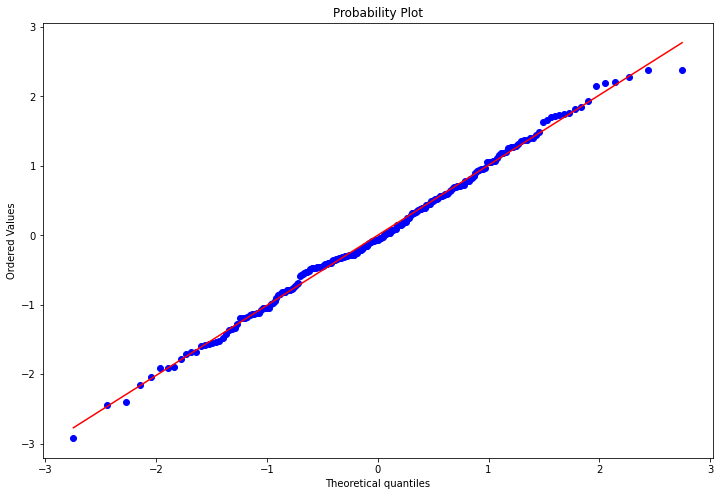

In [40]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

#### Checking normal distribution by `shapiro method`

The `shapiro-wilk` test is a statistical test that numerically accesses whether a distribution of a sample comes from a population that had a gaussian distribution.

The null-hypothesis of the `shapiro-wilk` test is, thus, that your sample comes from a normal distribution.

If the p-value is greater than 0.05, it means you cannot reject the hypothesis that the sample comes from a population that has a normal distribution.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [173]:
stats.shapiro(diff)

(0.9943222403526306, 0.1953406035900116)

The first item on the tuple is called the W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

### Independent t-test by using `scipy.stats`

In [41]:
sample_01.cnt.mean()

4682.809523809524

In [42]:
sample_02.cnt.mean()

4330.168831168831

In [44]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

# H0: media de cnt em working_day = 1 era igual a media de cnt em working_day = 0
# Como pvalue > 0.05, não consegui rejeitar a hipótese nula. Portanto, posso continuar trabalhando com H0

Ttest_indResult(statistic=1.9026050730249746, pvalue=0.05771626227635512)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [45]:
import researchpy as rp

In [ ]:
rp.ttest()

In [49]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [50]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4682.809524,1929.847653,126.974653,4432.627330,4932.991718
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4506.489177,1997.585340,92.936081,4323.858327,4689.120028


In [51]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   352.6407
1      Degrees of freedom =   460.0000
2                       t =     1.9026
3   Two side test p value =     0.0577
4  Difference < 0 p value =     0.9711
5  Difference > 0 p value =     0.0289
6               Cohen's d =     0.1770
7               Hedge's g =     0.1767
8           Glass's delta =     0.1827
9                       r =     0.0884


In [52]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,above_average_temp
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


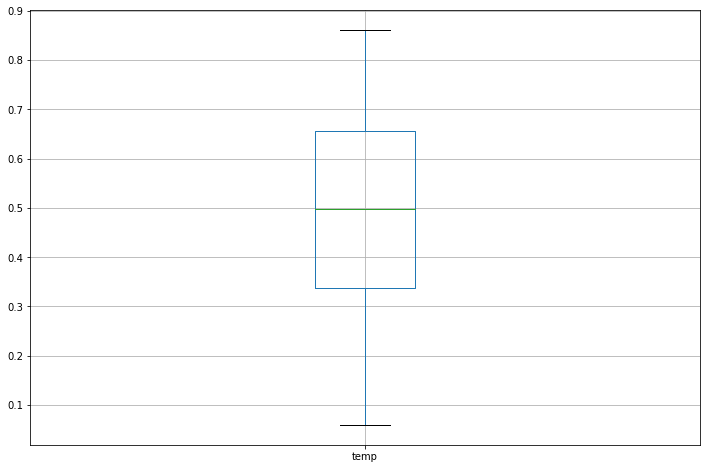

In [53]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [54]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,above_average_temp
722,1,12,0,0,1,0.245833,1787,False
678,4,11,0,1,1,0.361667,5992,False
557,3,7,0,1,1,0.716667,7264,True
150,2,5,0,1,1,0.775000,3982,True
187,3,7,0,1,1,0.750000,4592,True
492,2,5,0,1,2,0.537500,6273,True
123,2,5,0,1,2,0.414167,2633,False
32,1,2,0,1,2,0.260000,1526,False
459,2,4,0,1,1,0.541667,6436,True
351,4,12,0,0,1,0.238333,2431,False


In [55]:
bike_sharing_data.groupby('above_average_temp')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
above_average_temp,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


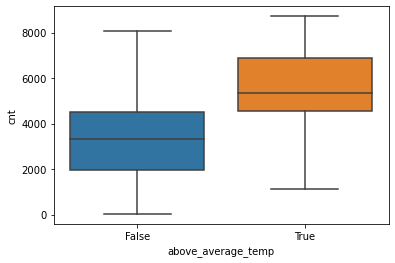

In [56]:
sns.boxplot(x='above_average_temp', y='cnt', data=bike_sharing_data)

In [58]:
sample_01 = bike_sharing_data.query('above_average_temp == True').reset_index(drop=True)

sample_02 = bike_sharing_data.query('above_average_temp == False').reset_index(drop=True)

In [59]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [60]:
sample_01 = sample_01.sample(364).reset_index(drop=True)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [189]:
# Test for equal variances

In [61]:
# H0: samples have equal variances
# H1: samples have different variances

stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.327277092615899, pvalue=0.037856391755788865)

Como pvalue < 0.05, tenho 95% de confiança em dizer que eu posso rejeitar a hipótese nula (e portanto, o ideal seria seguir com a hipótese alternativa)

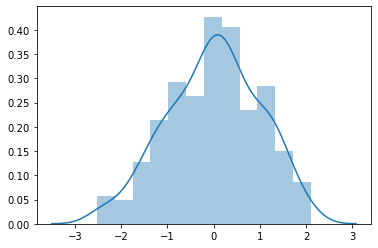

In [62]:
diff = scale(sample_01['cnt'] - sample_02['cnt'])
sns.distplot(diff)

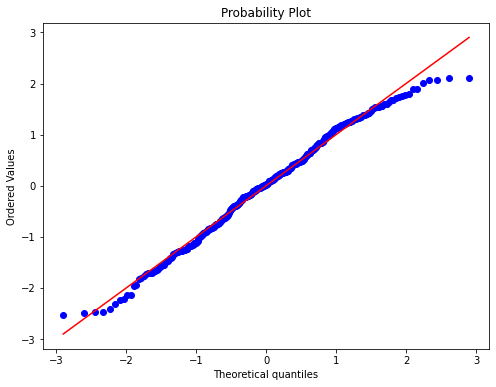

In [63]:
plt.figure(figsize=(8, 6))
stats.probplot(diff, plot=plt, dist='norm')
plt.show()

In [64]:
# H0: Os dados vem de uma distribuição normal

stats.shapiro(diff)

(0.9896731972694397, 0.011438274756073952)

In [65]:
# H0: media de sample01 é igual a media de sample02

stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.8651678908146, pvalue=6.643648737853357e-65)

## Welch's t-test.

A more robust test that does not require variances to be equal.

In [66]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'], equal_var=False)

Ttest_indResult(statistic=18.8651678908146, pvalue=1.0390224666713129e-64)

Como pvalue << 0.05, eu posso rejeitar a hipótese nula (a hipótese de que as médias são iguais)

## Researchpy


In [67]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [68]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5610.107143,1480.239498,77.585631,5457.533398,5762.680888
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4498.885989,1938.790033,71.856339,4357.815293,4639.956685


In [69]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2222.4423
1      Degrees of freedom =    713.4679
2                       t =     18.8652
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3984
7               Hedge's g =      1.3969
8           Glass's delta =      1.5014
9                       r =      0.5769
